In [ ]:
!pip install lmfit
!pip install umap-learn
!pip install tpot


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap
from tpot import TPOTClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()
pl.rc('font',family='Arial')

In [9]:
import os
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'labels.csv',
 'labels.xlsx',
 'Untitled.ipynb']

In [10]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")
data.head()

,GeneID,GSM1662534,GSM1662535,GSM1662536,GSM1662537,GSM1662538,GSM1662539,GSM1662540,GSM1662541,GSM1662542,...,GSM1817123,GSM1817124,GSM1817125,GSM1817126,GSM1817127,GSM1817128,GSM1817129,GSM1817130,GSM1817131,GSM1817132
0,100287102,969,1404,3889,906,2247,2610,1097,421,2955,...,830,296,1605,956,2312,880,343,1777,1382,1300
1,653635,80,101,116,26,53,67,97,54,78,...,52,33,74,37,92,25,21,52,27,30
2,102466751,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,107985730,2,0,0,0,0,0,0,0,1,...,1,3,0,1,0,0,0,0,0,1
4,100302278,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
labels.head()

,IDs,CancerType
0,3-Breast-Her2-ampl,Breast
1,8-Breast-WT,Breast
2,10-Breast-Her2-ampl,Breast
3,Breast-100,Breast
4,15-Breast-Her2-ampl,Breast


In [19]:
data.shape

(39376, 285)

In [13]:
X = data.drop(data.columns[0],axis=1)
Y = labels.CancerType

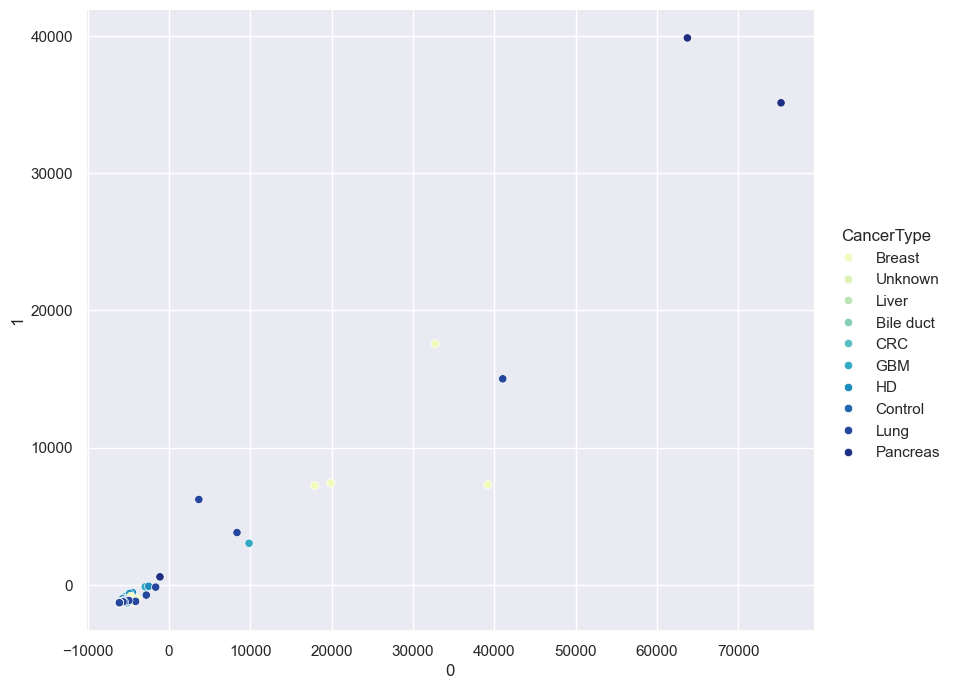

In [15]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

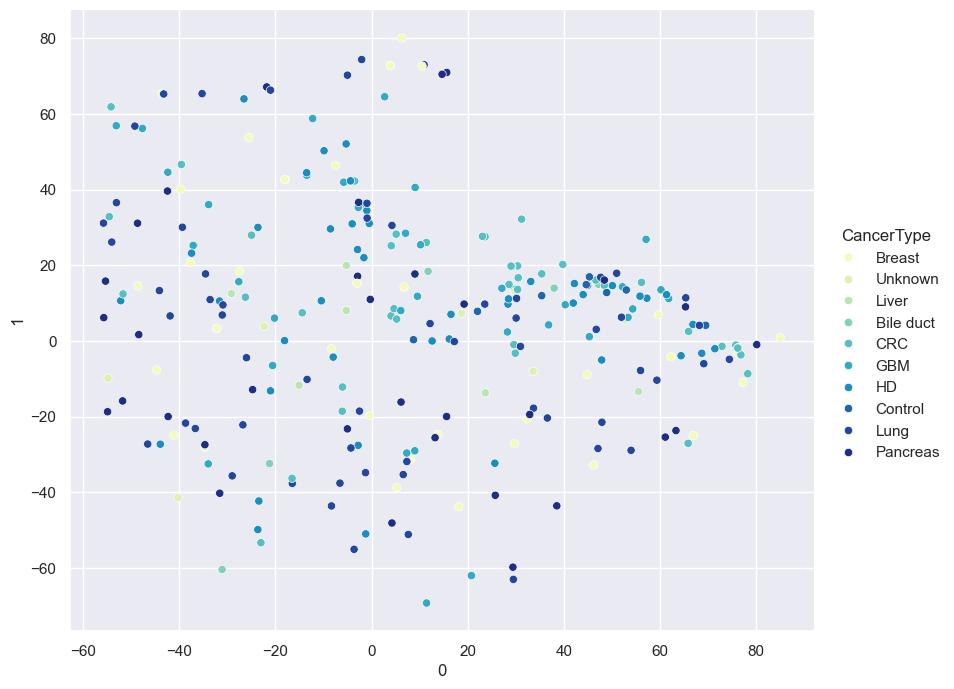

In [17]:
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

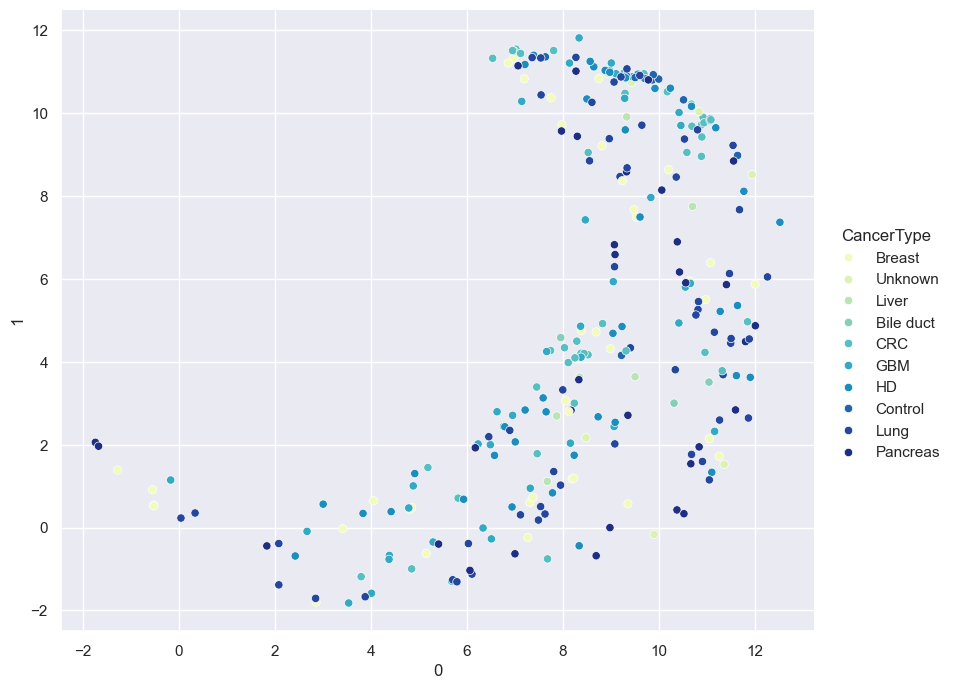

In [18]:
X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()